In [4]:
import sqlite3
import numpy as np
import pandas as pd

In [5]:
 # Making a connection between sqlite3 
    # database and Python Program
sqlConnection = sqlite3.connect('data.db')

In [6]:
balances_query = "SELECT * FROM balances" 
balances_query_df = pd.read_sql_query(balances_query, sqlConnection)

client_query = "SELECT * FROM client" 
client_df = pd.read_sql_query(client_query, sqlConnection)

client_products_query = "SELECT * FROM client_products" 
client_products_df = pd.read_sql_query(client_products_query, sqlConnection)

inv_camp_query = "SELECT * FROM inv_campaign_eval" 
inv_camp_df = pd.read_sql_query(inv_camp_query, sqlConnection)


In [7]:
balances_query_df.shape

(290212, 4)

In [8]:
balances_query_df.dtypes

date          object
balance      float64
client_id      int64
currency      object
dtype: object

In [9]:
client_df.dtypes

client_id      int64
age          float64
job           object
marital       object
education     object
gender        object
dtype: object

In [10]:
client_products_df.dtypes

client_id         int64
has_deposits     object
loan             object
has_insurance    object
has_mortgage     object
dtype: object

In [11]:
inv_camp_df.dtypes

client_id     int64
poutcome     object
dtype: object

In [12]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  11162 non-null  int64  
 1   age        10930 non-null  float64
 2   job        10724 non-null  object 
 3   marital    11162 non-null  object 
 4   education  11162 non-null  object 
 5   gender     11162 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 523.3+ KB


In [13]:
# Check for missing values in each column
client_df.isnull().sum()

client_id      0
age          232
job          438
marital        0
education      0
gender         0
dtype: int64

In [14]:
inv_camp_df

,client_id,poutcome
0,249789938,success
1,1504633819,failure
2,1952195738,success
3,989726384,success
4,1971878545,failure
...,...,...
2294,1270855655,failure
2295,471724023,success
2296,620088171,failure
2297,1518319265,success


In [15]:
client_products_df.isnull().sum()

client_id        0
has_deposits     0
loan             0
has_insurance    0
has_mortgage     0
dtype: int64

In [16]:
client_df['age'] = client_df['age'].fillna(client_df['age'].median())
print(client_df)
client_df.isnull().sum()

        client_id   age            job   marital  education gender
0       249789938  38.0       services   married  secondary      M
1      1222646323  46.0       services  divorced    unknown      M
2       451375919  33.0         admin.    single  secondary      F
3       338972671  44.0  self-employed   married  secondary      F
4      1472834688  36.0    blue-collar   married    primary      M
...           ...   ...            ...       ...        ...    ...
11157   543198889  40.0    blue-collar    single    unknown      M
11158   458558558  41.0      housemaid  divorced    primary      F
11159  1426334329  59.0     technician   married    primary      F
11160   831035343  42.0     management   married   tertiary      M
11161   705801685  36.0    blue-collar    single  secondary      F

[11162 rows x 6 columns]


client_id      0
age            0
job          438
marital        0
education      0
gender         0
dtype: int64

In [17]:
new_client_df = client_df.drop('job', axis=1)

print(new_client_df)
new_client_df.isnull().sum()

        client_id   age   marital  education gender
0       249789938  38.0   married  secondary      M
1      1222646323  46.0  divorced    unknown      M
2       451375919  33.0    single  secondary      F
3       338972671  44.0   married  secondary      F
4      1472834688  36.0   married    primary      M
...           ...   ...       ...        ...    ...
11157   543198889  40.0    single    unknown      M
11158   458558558  41.0  divorced    primary      F
11159  1426334329  59.0   married    primary      F
11160   831035343  42.0   married   tertiary      M
11161   705801685  36.0    single  secondary      F

[11162 rows x 5 columns]


client_id    0
age          0
marital      0
education    0
gender       0
dtype: int64

In [18]:
client_products_df = client_products_df.replace(['n'], 'no')

In [19]:
client_products_df = client_products_df.replace(['y'], 'yes')


In [20]:
print(client_products_df)

        client_id has_deposits loan has_insurance has_mortgage
0       249789938          yes   no            no           no
1      1222646323           no   no            no           no
2       451375919           no   no            no          yes
3       338972671           no   no           yes          yes
4      1472834688          yes   no            no          yes
...           ...          ...  ...           ...          ...
11157   543198889           no   no            no          yes
11158   458558558           no   no            no          yes
11159  1426334329           no   no           yes          yes
11160   831035343           no   no            no           no
11161   705801685          yes   no            no          yes

[11162 rows x 5 columns]


In [21]:
new_client_df['age'] = new_client_df['age'].astype(int)
print(new_client_df)

        client_id  age   marital  education gender
0       249789938   38   married  secondary      M
1      1222646323   46  divorced    unknown      M
2       451375919   33    single  secondary      F
3       338972671   44   married  secondary      F
4      1472834688   36   married    primary      M
...           ...  ...       ...        ...    ...
11157   543198889   40    single    unknown      M
11158   458558558   41  divorced    primary      F
11159  1426334329   59   married    primary      F
11160   831035343   42   married   tertiary      M
11161   705801685   36    single  secondary      F

[11162 rows x 5 columns]


In [22]:
sqliteConnection = sqlite3.connect('data.db')
sql_query = """SELECT name FROM sqlite_master  
  WHERE type='table';"""
cursor = sqliteConnection.cursor()
cursor.execute(sql_query)
print(cursor.fetchall())

[('balances',), ('client_products',), ('client',), ('inv_campaign_eval',)]


In [23]:
balances_query = """SELECT * FROM balances"""
balances_df = pd.read_sql_query(balances_query, sqliteConnection)

In [24]:
balances_df.currency.unique()
balances_df.currency.isnull().values.any()

False

In [25]:
df_balances = balances_df
print(df_balances)

                              date      balance  client_id currency
0       2023-06-06 16:21:15.291346  2680.467773  249789938      CZK
1       2023-05-23 16:21:15.291346  2654.055419  249789938      CZK
2       2023-05-09 16:21:15.291346  2620.835872  249789938      CZK
3       2023-04-25 16:21:15.291346  2720.315925  249789938      CZK
4       2023-04-11 16:21:15.291346  2687.601982  249789938      CZK
...                            ...          ...        ...      ...
290207  2022-08-16 16:22:46.440217   145.454161  705801685      CZK
290208  2022-08-02 16:22:46.440217    -5.497494  705801685      CZK
290209  2022-07-19 16:22:46.440217   -45.891607  705801685      CZK
290210  2022-07-05 16:22:46.440217    19.473946  705801685      CZK
290211  2022-06-21 16:22:46.440217   163.032053  705801685      CZK

[290212 rows x 4 columns]


In [26]:
df_balance_new = df_balances.copy()
df_balance_new.loc[df_balance_new['balance'] == 'USD', 'currency':] *= 23
df_balance_new.loc[df_balance_new['currency'] == 'USD', 'currency'] = "CZK"
df_balance_new.loc[df_balance_new['balance'] == 'EUR', 'currency':] *= 25
df_balance_new.loc[df_balance_new['currency'] == 'EUR', 'currency'] = "CZK"
print(df_balance_new)

                              date      balance  client_id currency
0       2023-06-06 16:21:15.291346  2680.467773  249789938      CZK
1       2023-05-23 16:21:15.291346  2654.055419  249789938      CZK
2       2023-05-09 16:21:15.291346  2620.835872  249789938      CZK
3       2023-04-25 16:21:15.291346  2720.315925  249789938      CZK
4       2023-04-11 16:21:15.291346  2687.601982  249789938      CZK
...                            ...          ...        ...      ...
290207  2022-08-16 16:22:46.440217   145.454161  705801685      CZK
290208  2022-08-02 16:22:46.440217    -5.497494  705801685      CZK
290209  2022-07-19 16:22:46.440217   -45.891607  705801685      CZK
290210  2022-07-05 16:22:46.440217    19.473946  705801685      CZK
290211  2022-06-21 16:22:46.440217   163.032053  705801685      CZK

[290212 rows x 4 columns]


In [27]:
df_balance_new.currency.unique()


array(['CZK'], dtype=object)

In [28]:
# calculate IQR for column Height
Q1 = df_balance_new['balance'].quantile(0.25)
Q3 = df_balance_new['balance'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5

In [29]:
print(Q1)
print(Q3)
print(IQR)

118.93012764749577
1694.5009827361316
1575.5708550886359


In [30]:
outliers = df_balance_new[(df_balance_new['balance'] < Q1 - threshold * IQR) | (df_balance_new['balance'] > Q3 + threshold * IQR)]
print(outliers)


                              date       balance   client_id currency
234     2023-06-06 16:21:15.358424   5476.241582  1504633819      CZK
235     2023-05-23 16:21:15.358424   5378.527881  1504633819      CZK
236     2023-05-09 16:21:15.358424   5435.972807  1504633819      CZK
237     2023-04-25 16:21:15.358424   5439.848545  1504633819      CZK
238     2023-04-11 16:21:15.358424   5409.490995  1504633819      CZK
...                            ...           ...         ...      ...
290181  2022-08-16 16:22:46.425756  24798.438285   831035343      CZK
290182  2022-08-02 16:22:46.425756  24678.831382   831035343      CZK
290183  2022-07-19 16:22:46.425756  24840.036761   831035343      CZK
290184  2022-07-05 16:22:46.425756  24872.197971   831035343      CZK
290185  2022-06-21 16:22:46.425756  24713.929206   831035343      CZK

[27410 rows x 4 columns]


In [32]:
join_NC_BN = pd.merge (df_balance_new, new_client_df,  how='right', on= 'client_id')

In [33]:
join_NC_BN

,date,balance,client_id,currency,age,marital,education,gender
0,2023-06-06 16:21:15.291346,2680.467773,249789938,CZK,38,married,secondary,M
1,2023-05-23 16:21:15.291346,2654.055419,249789938,CZK,38,married,secondary,M
2,2023-05-09 16:21:15.291346,2620.835872,249789938,CZK,38,married,secondary,M
3,2023-04-25 16:21:15.291346,2720.315925,249789938,CZK,38,married,secondary,M
4,2023-04-11 16:21:15.291346,2687.601982,249789938,CZK,38,married,secondary,M
...,...,...,...,...,...,...,...,...
290207,2022-08-16 16:22:46.440217,145.454161,705801685,CZK,36,single,secondary,F
290208,2022-08-02 16:22:46.440217,-5.497494,705801685,CZK,36,single,secondary,F
290209,2022-07-19 16:22:46.440217,-45.891607,705801685,CZK,36,single,secondary,F
290210,2022-07-05 16:22:46.440217,19.473946,705801685,CZK,36,single,secondary,F


In [35]:
import seaborn as sns

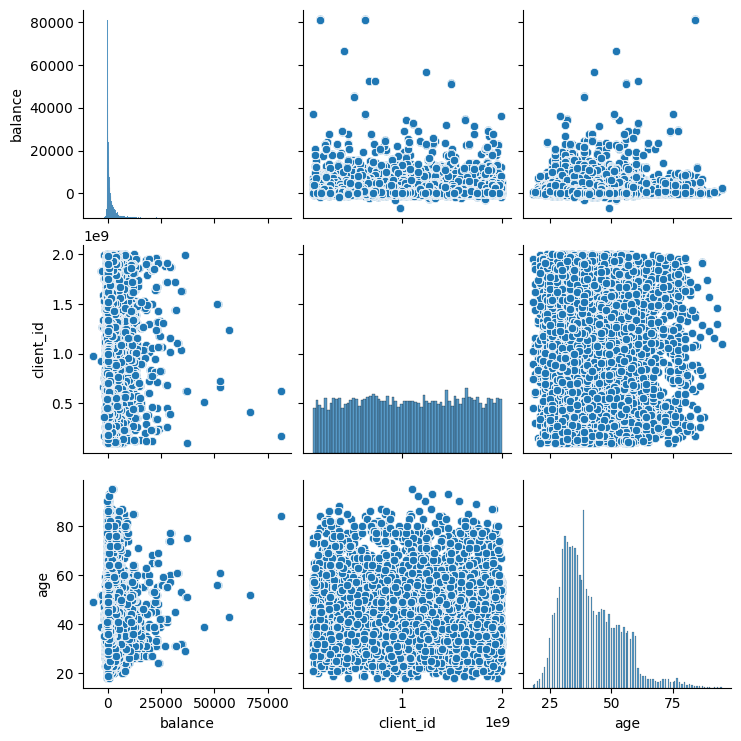

In [36]:
sns.pairplot(join_NC_BN)